In [165]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime 

from mpl_finance import candlestick_ohlc

In [166]:
filename = r'../data/aapl.csv'
df = pd.read_csv(filename)
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2008-10-14,116.26,116.40,103.14,104.08,70749800,104.08
1,2008-10-13,104.55,110.53,101.02,110.26,54967000,110.26
2,2008-10-10,85.70,100.00,85.00,96.80,79260700,96.80
3,2008-10-09,93.35,95.80,86.60,88.74,57763700,88.74
4,2008-10-08,85.91,96.33,85.68,89.79,78847900,89.79


In [167]:
dt = datetime.strptime('2008-10-14', '%Y-%m-%d')
dt.timestamp()

1223913600.0

In [168]:
# Map the column date to the appropriate format
df['Date'] = df['Date'].apply(lambda dt: datetime.strptime(dt, '%Y-%m-%d').timestamp() / 1000)

ohlc = df[['Date','Open','High','Low','Close']]
ohlc.head()

,Date,Open,High,Low,Close
0,1223913.6,116.26,116.40,103.14,104.08
1,1223827.2,104.55,110.53,101.02,110.26
2,1223568.0,85.70,100.00,85.00,96.80
3,1223481.6,93.35,95.80,86.60,88.74
4,1223395.2,85.91,96.33,85.68,89.79


In [169]:
ohlc = ohlc.head(20)

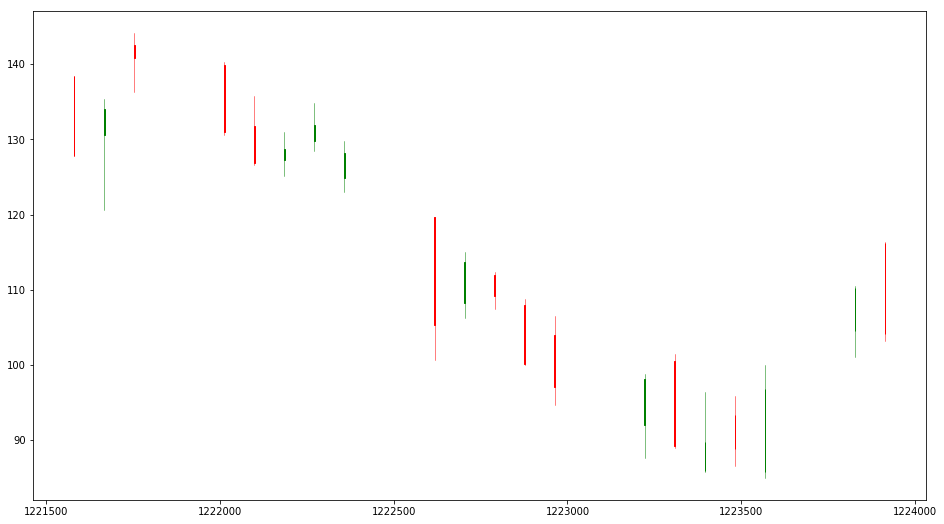

In [170]:
f1, ax = plt.subplots(figsize = (16,9))

# plot the candlesticks
candlestick_ohlc(ax, ohlc.values, width=2, colorup='green', colordown='red')

def readable_date(timestamp):
    return datetime.fromtimestamp(timestamp).strftime('%Y-%m')

plt.show()